In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
import matplotlib.pyplot as plt

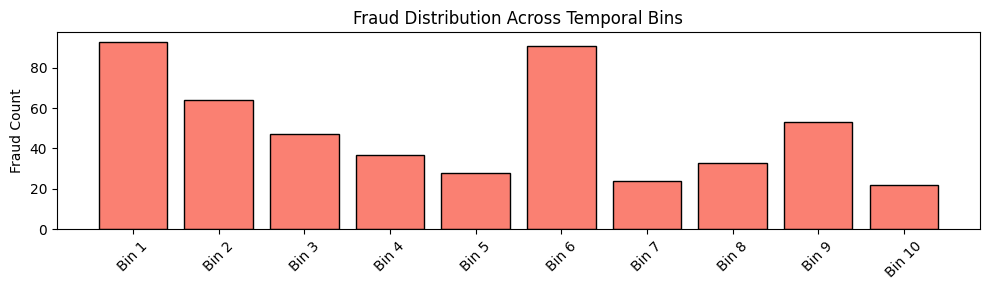

In [ ]:
df_sorted = df.sort_values("Time").reset_index(drop=True)

# Create 10 temporal bins
n_bins = 10
df_sorted['Bin'] = pd.qcut(df_sorted.index, q=n_bins, labels=[f'Bin {i+1}' for i in range(n_bins)])

# Count frauds per bin
fraud_counts = df_sorted[df_sorted['Class'] == 1]['Bin'].value_counts().sort_index()

# Plot fraud count distribution across time bins
plt.figure(figsize=(10, 3))
plt.bar(fraud_counts.index, fraud_counts.values, color='salmon', edgecolor='k')
plt.ylabel('Fraud Count')
plt.title('Fraud Distribution Across Temporal Bins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
df.isnull().sum()  # as we can see there are no missing values

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


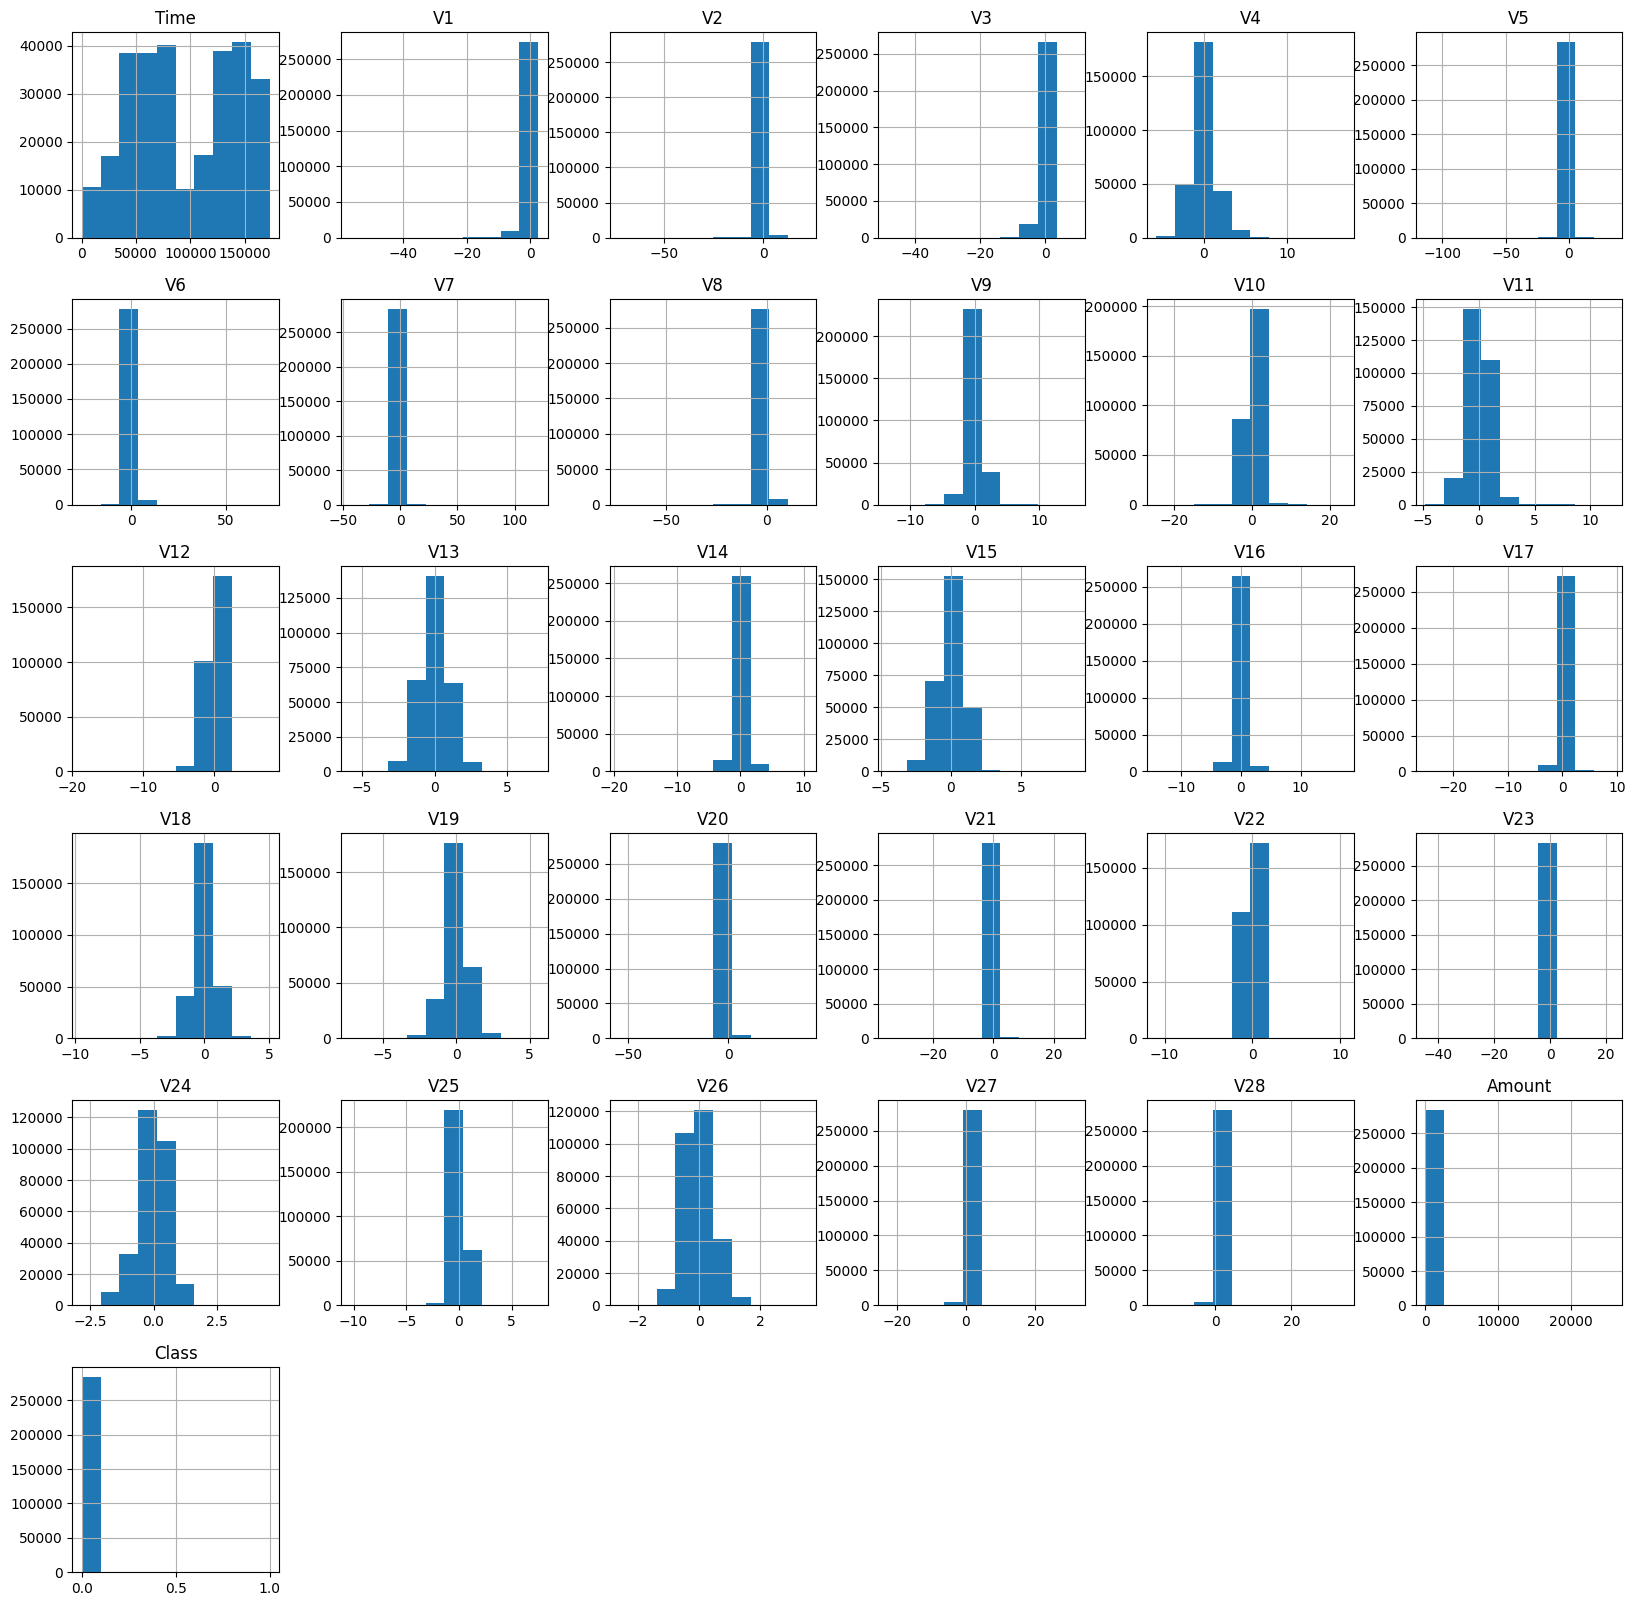

In [ ]:
# plot the histogram of each parameter
df.hist(figsize = (20, 20))
plt.show()

In [ ]:
import seaborn as sns

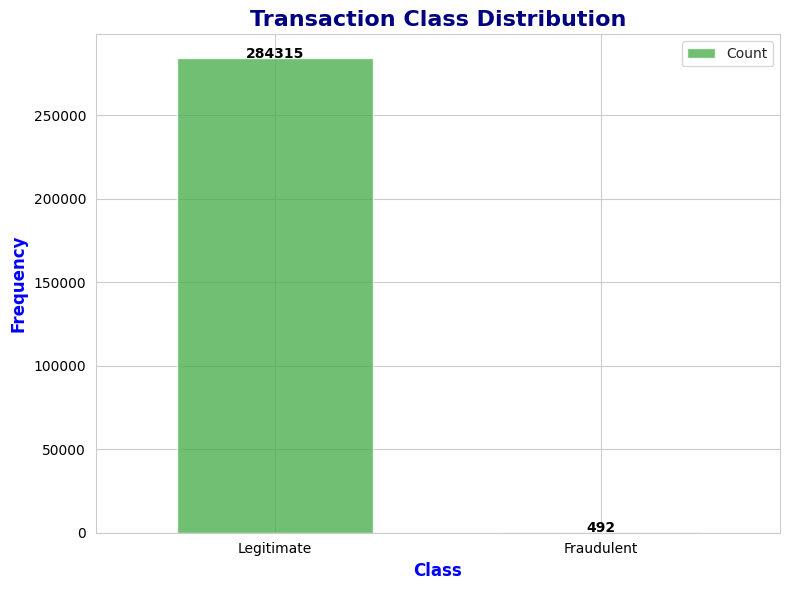

In [ ]:
count_classes = df['Class'].value_counts()

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
colors = ['#4CAF50', '#FF5733']

count_classes.plot(kind='bar', color=colors, width=0.6, alpha=0.8)

plt.title("Transaction Class Distribution", fontsize=16, fontweight='bold', color='navy')
plt.xlabel("Class", fontsize=12, fontweight='bold', color='blue')
plt.ylabel("Frequency", fontsize=12, fontweight='bold', color='blue')

LABELS = ["Legitimate", "Fraudulent"]
plt.xticks(range(2), LABELS, rotation=0, fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.legend(['Count'], loc='upper right', fontsize=10)

for i, value in enumerate(count_classes):
    plt.text(i, value + 2, str(value), ha='center', fontsize=10, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

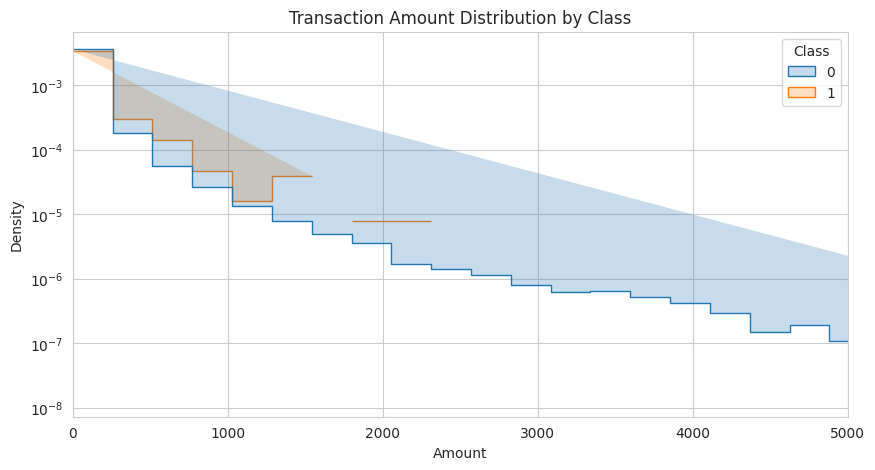

In [ ]:
# Distribution of transaction amount by class
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Amount', hue='Class', bins=100, log_scale=(False, True), element='step', stat='density', common_norm=False)
plt.title("Transaction Amount Distribution by Class")
plt.xlim(0, 5000)
plt.show()

Both fraudulent and non-fraudulent transactions are skewed toward low amounts.

Fraudulent transactions tend to occur across a narrower amount range, mostly below $2500, indicating potential evasion strategies to avoid detection by amount-based rules.

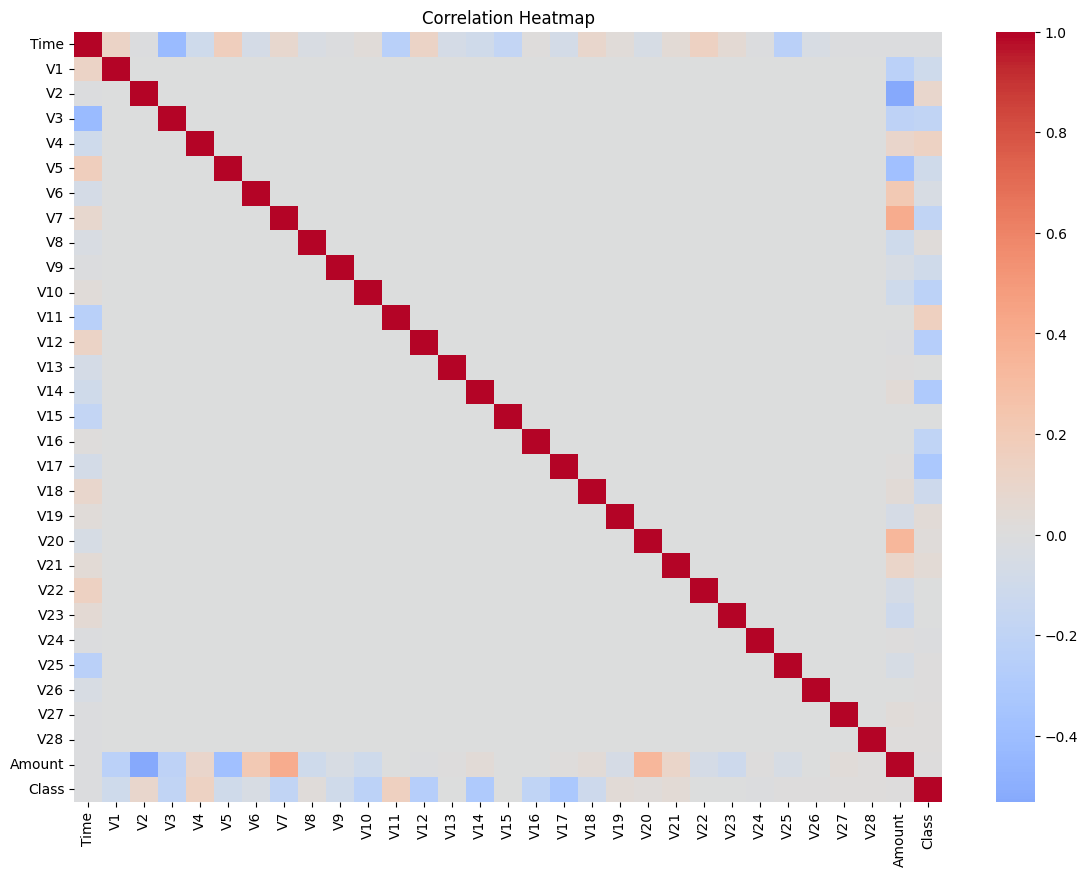

In [ ]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

Most features are weakly correlated with Class, with exceptions like V10, V12, V14, and V17 showing moderate negative/positive correlations.

These features may hold stronger predictive power and could be prioritized during feature selection or model interpretability analysis.

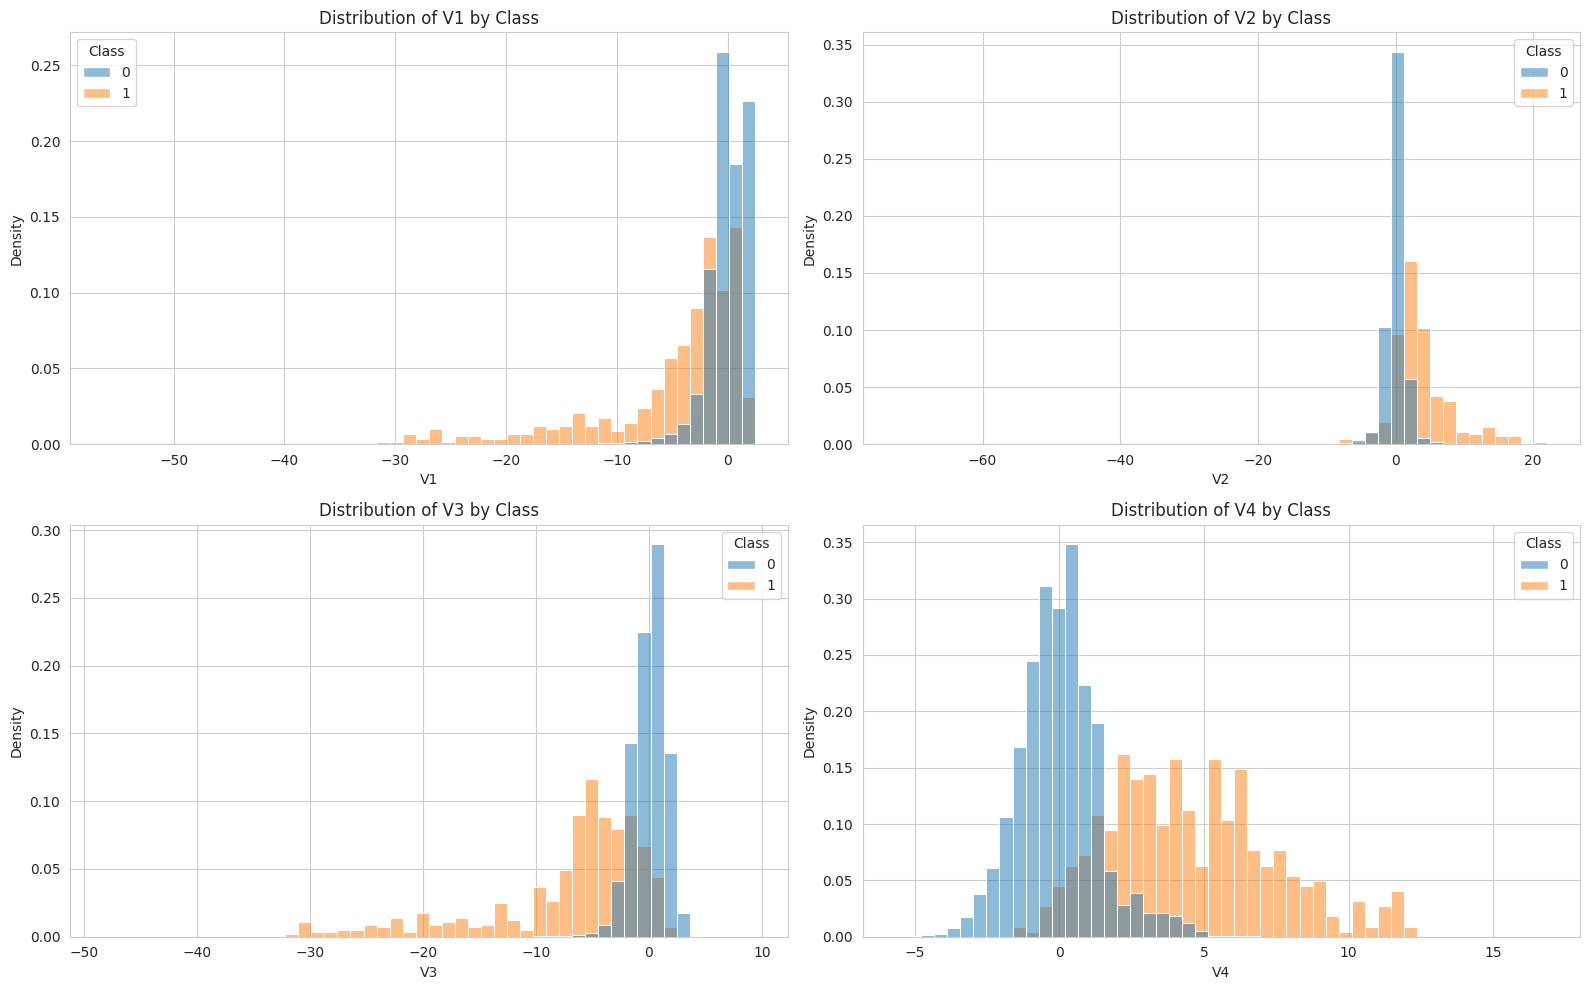

In [ ]:
# Distribution of first few PCA components
plt.figure(figsize=(16, 10))
for i in range(1, 5):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=f'V{i}', hue='Class', bins=50, stat='density', common_norm=False)
    plt.title(f"Distribution of V{i} by Class")
plt.tight_layout()
plt.show()

Clear differences in distributions between fraud and non-fraud classes, particularly for V1, V2, and V4.

PCA components separate the classes effectively in certain projections—supporting their utility in distinguishing fraud patterns even without domain-specific features.

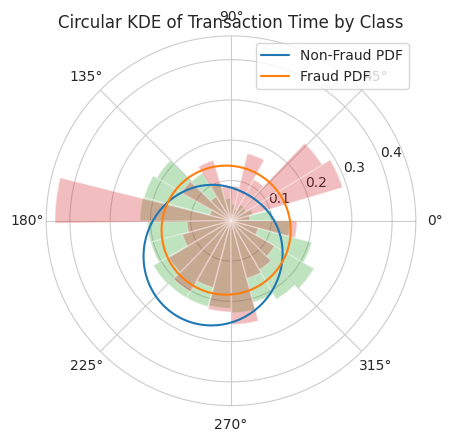

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import vonmises

seconds_in_day = 24 * 3600
df['sec_of_day'] = df['Time'] % seconds_in_day
df['angle'] = 2 * np.pi * df['sec_of_day'] / seconds_in_day

angles_nonfraud = df.loc[df['Class'] == 0, 'angle']
angles_fraud = df.loc[df['Class'] == 1, 'angle']

k_non, loc_non, _ = vonmises.fit(angles_nonfraud, fscale=1)
k_fraud, loc_fraud, _ = vonmises.fit(angles_fraud, fscale=1)
grid = np.linspace(0, 2 * np.pi, 200)

pdf_nonfraud = vonmises.pdf(grid, k_non, loc_non)
pdf_fraud = vonmises.pdf(grid, k_fraud, loc_fraud)

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.set_title('Circular KDE of Transaction Time by Class')

ax.plot(grid, pdf_nonfraud, label='Non-Fraud PDF')
ax.plot(grid, pdf_fraud, label='Fraud PDF')

ax.hist(angles_nonfraud, bins=24, density=True, alpha=0.3)
ax.hist(angles_fraud, bins=24, density=True, alpha=0.3)

ax.legend(loc='upper right')

plt.show()


It is a polar plot (circular plot) that visualizes the distribution of transaction times (in a 24-hour format, mapped to 360°) for:

    Non-Fraud transactions (blue line)

    Fraud transactions (orange line)

Peaks on the curve = higher concentration of transactions at that time of day.

Non-Fraud (blue) shows clear peaks—likely reflecting human working/banking hours.

Fraud (orange) is more evenly spread or shifted—may indicate fraudsters operate outside typical user patterns.

Fraudulent transactions do not follow the same daily temporal patterns as legitimate ones, suggesting that time-of-day could serve as a valuable feature for anomaly detection or time-based rule filtering.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/creditcard.csv')

After SMOTE (training set only): Counter({0: 199020, 1: 199020})


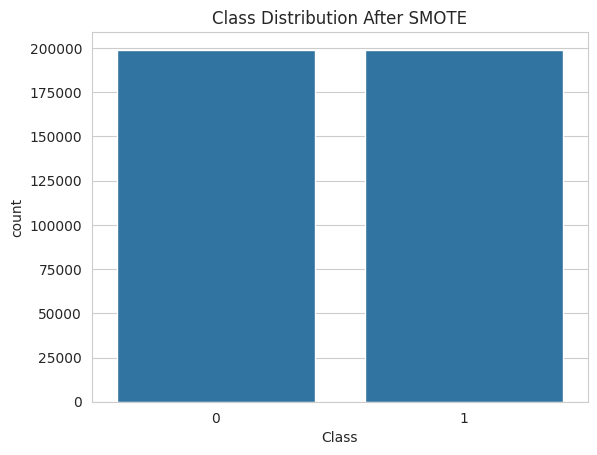

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()

df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])
df['Time_scaled'] = scaler.fit_transform(df[['Time']])

df = df.drop(['Amount', 'Time'], axis=1)

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After SMOTE (training set only):", Counter(y_train_res))

sns.countplot(x=y_train_res)
plt.title("Class Distribution After SMOTE")
plt.show()


What Is Time-Aware SMOTE?

Instead of applying SMOTE to the full training set randomly, we:

Sort data by time (simulating real-world transaction order).

Split into sequential time-based bins (e.g., chunks of 10k–50k rows).

Apply SMOTE within each bin to preserve temporal structure and avoid unrealistic synthetic samples.

This approach simulates evolving fraud patterns and avoids "future leakage."

Class distribution after Time-Aware SMOTE: Counter({1: 199016, 0: 199016})


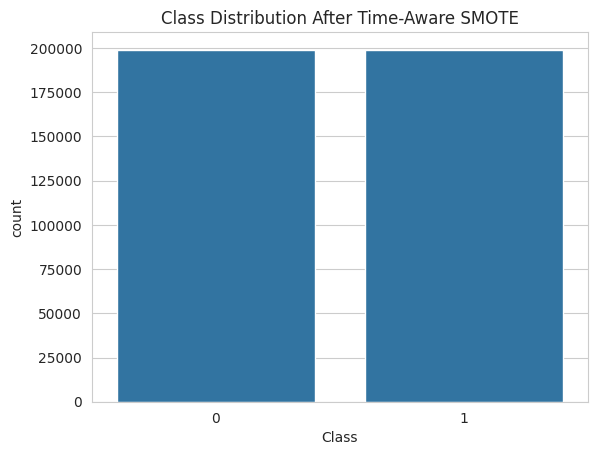

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Datasets/creditcard.csv')

# Step 2: Scale 'Amount' and 'Time'
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])
df['Time_scaled'] = scaler.fit_transform(df[['Time']])
df.drop(['Amount', 'Time'], axis=1, inplace=True)

# Step 3: Sort by time (to simulate real-time transaction flow)
df_sorted = df.sort_values(by='Time_scaled').reset_index(drop=True)

# Step 4: Train-test split (stratified)
X = df_sorted.drop('Class', axis=1)
y = df_sorted['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 5: Merge X_train and y_train to allow time-wise binning
train_df = pd.concat([X_train, y_train], axis=1)

# Step 6: Time-aware SMOTE — Split into bins and resample
def time_aware_smote(df, n_bins=10):
    bin_size = len(df) // n_bins
    bins = [df[i*bin_size:(i+1)*bin_size] for i in range(n_bins)]

    resampled_data = []
    sm = SMOTE(random_state=42)

    for bin_df in bins:
        X_bin = bin_df.drop('Class', axis=1)
        y_bin = bin_df['Class']

        # Apply SMOTE only if fraud exists in the bin
        if y_bin.value_counts().get(1, 0) > 0:
            X_res, y_res = sm.fit_resample(X_bin, y_bin)
            bin_res = pd.concat([pd.DataFrame(X_res, columns=X_bin.columns),
                                 pd.Series(y_res, name='Class')], axis=1)
            resampled_data.append(bin_res)
        else:
            resampled_data.append(bin_df)

    final_train_df = pd.concat(resampled_data).sample(frac=1, random_state=42).reset_index(drop=True)
    return final_train_df

# Apply Time-Aware SMOTE
balanced_train_df = time_aware_smote(train_df, n_bins=10)

# Step 7: Final X_train and y_train
X_train_res = balanced_train_df.drop('Class', axis=1)
y_train_res = balanced_train_df['Class']

print("Class distribution after Time-Aware SMOTE:", Counter(y_train_res))

# Optional: Visualize distribution
sns.countplot(x=y_train_res)
plt.title("Class Distribution After Time-Aware SMOTE")
plt.show()


Preserved the time-ordering of transactions (important for fraud evolution)

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve

# Create output folder
os.makedirs("figures1", exist_ok=True)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Store ROC info for combined plot
roc_data = {}

# Train, evaluate, and save confusion matrix
for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Evaluation
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    auc_score = roc_auc_score(y_test, y_proba)
    print(f"AUC Score: {auc_score:.4f}")

    # === Confusion Matrix ===
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Non-Fraud', 'Fraud'],
                yticklabels=['Non-Fraud', 'Fraud'])
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.title(f"{name} - Confusion Matrix", fontsize=14)
    plt.tight_layout()
    cm_filename = f"figures1/{name.replace(' ', '_').lower()}_confusion_matrix.png"
    plt.savefig(cm_filename, dpi=300)
    plt.close()
    print(f"Confusion matrix saved to {cm_filename}")

    # Store ROC data
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_data[name] = (fpr, tpr, auc_score)

# === Combined ROC Curve Plot ===
plt.figure(figsize=(7, 5))
colors = ['darkblue', 'forestgreen', 'crimson']

for (name, (fpr, tpr, auc)), color in zip(roc_data.items(), colors):
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', linewidth=2, color=color)

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.title('ROC Curve Comparison of Models', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
combined_roc_filename = "figures1/combined_roc_curve.png"
plt.savefig(combined_roc_filename, dpi=300)
plt.close()
print(f"\nCombined ROC curve saved to {combined_roc_filename}")



Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.87      0.13       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443

AUC Score: 0.9663
Confusion matrix saved to figures1/logistic_regression_confusion_matrix.png

Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.81      0.76      0.79       148

    accuracy                           1.00     85443
   macro avg       0.91      0.88      0.89     85443
weighted avg       1.00      1.00      1.00     85443

AUC Score: 0.9686
Confusion matrix saved to figures1/random_forest_confusion_matrix.png

XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:35:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.76      0.80      0.78       148

    accuracy                           1.00     85443
   macro avg       0.88      0.90      0.89     85443
weighted avg       1.00      1.00      1.00     85443

AUC Score: 0.9737
Confusion matrix saved to figures1/xgboost_confusion_matrix.png

Combined ROC curve saved to figures1/combined_roc_curve.png



Random Forest Feature Importances:
V1: 0.0068
V2: 0.0237
V3: 0.0583
V4: 0.1248
V5: 0.0060
V6: 0.0070
V7: 0.0199
V8: 0.0090
V9: 0.0134
V10: 0.1141
V11: 0.0671
V12: 0.0808
V13: 0.0057
V14: 0.2287
V15: 0.0046
V16: 0.0468
V17: 0.0993
V18: 0.0101
V19: 0.0063
V20: 0.0047
V21: 0.0138
V22: 0.0040
V23: 0.0043
V24: 0.0042
V25: 0.0057
V26: 0.0058
V27: 0.0103
V28: 0.0057
Amount_scaled: 0.0036
Time_scaled: 0.0054


/tmp/ipython-input-25-3406489596.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances, y=top_features, palette="viridis") # Changed palette


Feature importance plot saved to figures2/random_forest_feature_importance.png


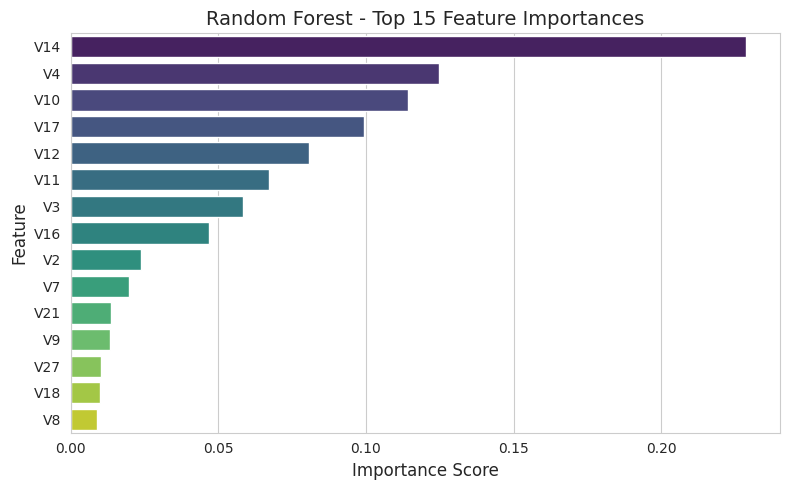


XGBoost Feature Importances:
V1: 0.0105
V2: 0.0080
V3: 0.0191
V4: 0.0618
V5: 0.0085
V6: 0.0069
V7: 0.0046
V8: 0.0190
V9: 0.0112
V10: 0.0094
V11: 0.0140
V12: 0.0215
V13: 0.0112
V14: 0.6618
V15: 0.0084
V16: 0.0069
V17: 0.0121
V18: 0.0115
V19: 0.0049
V20: 0.0051
V21: 0.0111
V22: 0.0061
V23: 0.0074
V24: 0.0067
V25: 0.0097
V26: 0.0053
V27: 0.0134
V28: 0.0099
Amount_scaled: 0.0052
Time_scaled: 0.0089


/tmp/ipython-input-25-3406489596.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances, y=top_features, palette="viridis") # Changed palette


Feature importance plot saved to figures2/xgboost_feature_importance.png


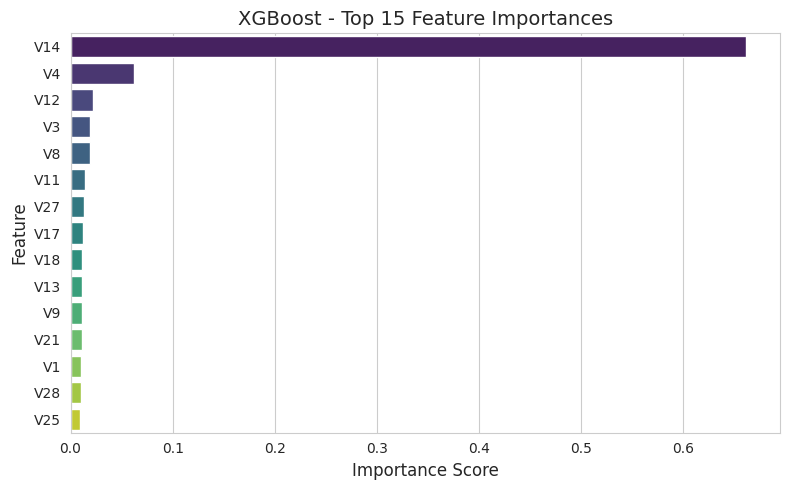

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve

# Create output folder
os.makedirs("figures2", exist_ok=True)

def plot_feature_importance(model, model_name, feature_names, top_n=15):
    """Plots and optionally prints feature importances for a given model."""
    # Determine importance source
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        print(f"\n{model_name} Feature Importances:")
        for feature, importance in zip(feature_names, importances):
            print(f"{feature}: {importance:.4f}")
    elif hasattr(model, "coef_"):
        importances = np.abs(model.coef_[0])
        print(f"\n{model_name} Coefficients (Absolute Value):")
        for feature, importance in zip(feature_names, importances):
            print(f"{feature}: {importance:.4f}")
    else:
        print(f"\n{model_name} does not support standard feature importance methods.")
        return

    # Top features for plotting
    indices = np.argsort(importances)[::-1][:top_n]
    top_features = np.array(feature_names)[indices]
    top_importances = importances[indices]

    # Plot
    plt.figure(figsize=(8, 5))
    sns.barplot(x=top_importances, y=top_features, palette="viridis") # Changed palette
    plt.title(f"{model_name} - Top {top_n} Feature Importances", fontsize=14)
    plt.xlabel("Importance Score", fontsize=12)
    plt.ylabel("Feature", fontsize=12)
    plt.tight_layout()

    # Save plot
    filename = f"figures2/{model_name.replace(' ', '_').lower()}_feature_importance.png" # Changed folder
    plt.savefig(filename, dpi=300)
    # plt.close() # Removed plt.close() to display the plot
    print(f"Feature importance plot saved to {filename}")


# Plot for Random Forest
plot_feature_importance(models["Random Forest"], "Random Forest", X_train_res.columns)
plt.show() # Added plt.show() to display the plot

# Plot for XGBoost
plot_feature_importance(models['XGBoost'], "XGBoost", X_train_res.columns)
plt.show() # Added plt.show() to display the plot

# Removed Logistic Regression plot call

Ranked bar plots showing which features (V1–V28, Amount_scaled, Time_scaled) were most important.

Visual justification for model decisions.

    SHAP (SHapley Additive exPlanations): Explains model predictions using game theory. Gives global (overall) and local (individual prediction) explanations.

    LIME (Local Interpretable Model-agnostic Explanations): Approximates a black-box model locally with an interpretable model (e.g., linear model around a prediction).

Since you're using tree-based models, SHAP is more powerful and works directly with XGBoost and Random Forest.

In [ ]:
!pip install shap

In [ ]:
models['XGBoost'].fit(X_train_res, y_train_res)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:36:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

SHAP bar summary saved to figures2/shap_summary_bar.png


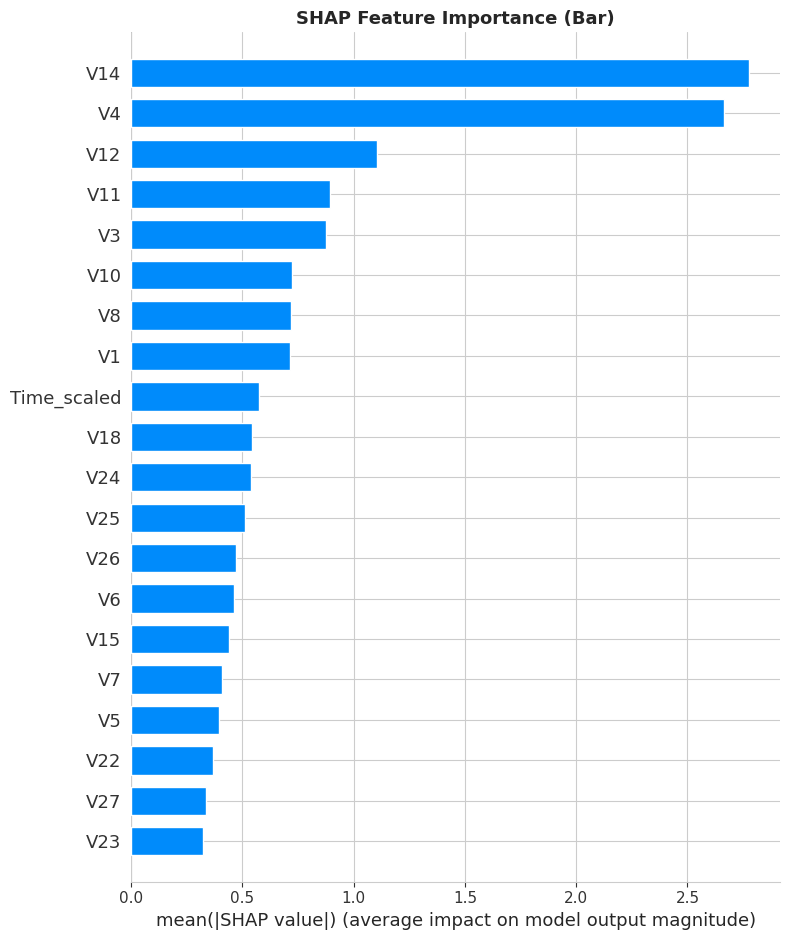

SHAP beeswarm summary saved to figures2/shap_summary_beeswarm.png


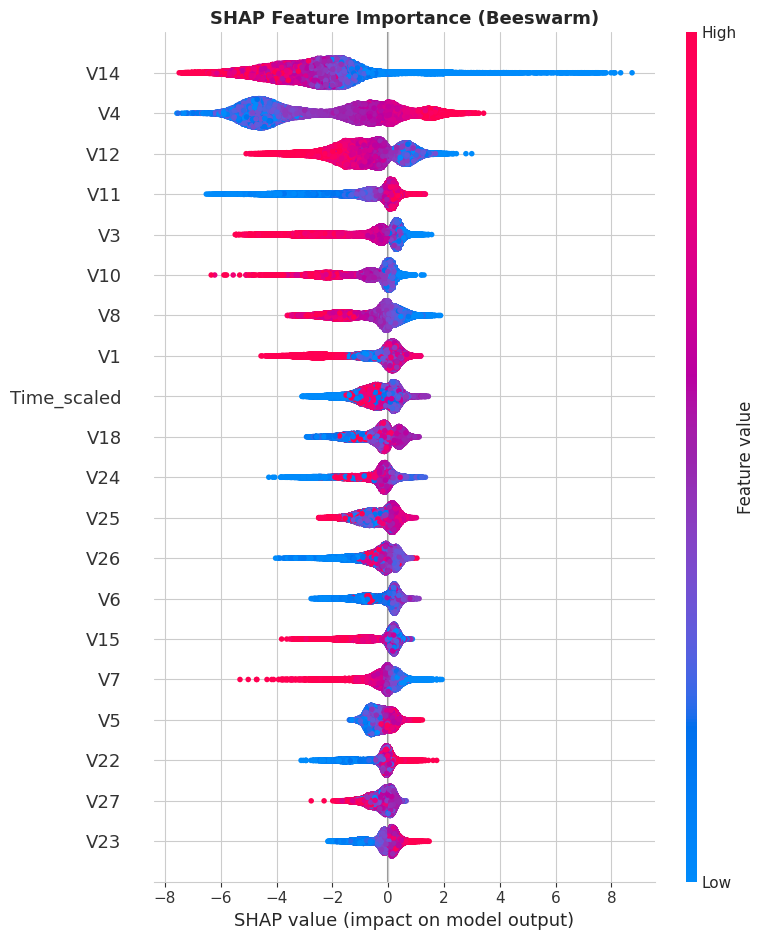

SHAP local force plot saved to figures2/shap_force_sample_100.html


In [ ]:
import os
import shap
import matplotlib.pyplot as plt

# === Create output directory ===
os.makedirs("figures2", exist_ok=True) # Changed folder to figures2

# === SHAP Explainer Initialization (Tree-based) ===
explainer = shap.TreeExplainer(models['XGBoost'])
shap_values = explainer.shap_values(X_test)

# === Global Summary Plot: Bar ===
plt.figure()
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Bar)", fontsize=13, weight='bold')
plt.tight_layout()
plt.savefig("figures2/shap_summary_bar.png", dpi=300, bbox_inches='tight') # Changed folder to figures2
# plt.close() # Removed plt.close() to display the plot
print("SHAP bar summary saved to figures2/shap_summary_bar.png") # Changed folder to figures2
plt.show()


# === Global Summary Plot: Beeswarm ===
plt.figure()
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Feature Importance (Beeswarm)", fontsize=13, weight='bold')
plt.tight_layout()
plt.savefig("figures2/shap_summary_beeswarm.png", dpi=300, bbox_inches='tight') # Changed folder to figures2
# plt.close() # Removed plt.close() to display the plot
print("SHAP beeswarm summary saved to figures2/shap_summary_beeswarm.png") # Changed folder to figures2
plt.show()


# === Local Explanation: SHAP Force Plot for a Single Sample ===
sample_index = 100

force_plot = shap.force_plot(
    explainer.expected_value,
    shap_values[sample_index],
    X_test.iloc[sample_index],
    matplotlib=False  # Enables interactive JS visualization
)

# Save interactive HTML version of the force plot
shap_html_path = "figures2/shap_force_sample_100.html" # Changed folder to figures2
shap.save_html(shap_html_path, force_plot)
print(f"SHAP local force plot saved to {shap_html_path}")

SHAP analysis was conducted to interpret the decisions made by the XGBoost model. The global summary plot revealed that features V17, V14, and V12 had the greatest influence on model output, corroborating feature importance findings. A local explanation on a fraud prediction (transaction ID 100) showed how specific values of V14 and V17 pushed the model toward a "fraud" decision, enhancing transparency.

🔬 Concept Summary: Autoencoder + XGBoost Ensemble

    Train an Autoencoder (unsupervised) on normal transactions.

    Compute reconstruction error for each sample.

    Use reconstruction error as a new feature, combined with the original features.

    Train XGBoost on this extended dataset.

This captures both:

    Known patterns (via XGBoost),

    Anomaly detection behavior (via AE reconstruction error).

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

# Normalize all features to [0,1] for AE
scaler_ae = MinMaxScaler()
X_train_scaled = scaler_ae.fit_transform(X_train_res)
X_test_scaled = scaler_ae.transform(X_test)

# AE input size = number of features
input_dim = X_train_scaled.shape[1]

# Autoencoder architecture
input_layer = Input(shape=(input_dim,))
encoded = Dense(14, activation='relu')(input_layer)
encoded = Dense(7, activation='relu')(encoded)
decoded = Dense(14, activation='relu')(encoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train on non-fraud only
X_train_normal = X_train_scaled[y_train_res == 0]
autoencoder.fit(X_train_normal, X_train_normal,
                epochs=10, batch_size=256, shuffle=True,
                validation_split=0.1, verbose=1)


Epoch 1/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0147 - val_loss: 0.0017
Epoch 2/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 3/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 4/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 5/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 6/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 7/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 8/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 9/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 10/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0013 - val_loss: 0.0013


In [ ]:
# Compute reconstruction error for train and test
train_recon = autoencoder.predict(X_train_scaled)
test_recon = autoencoder.predict(X_test_scaled)

train_error = np.mean(np.square(X_train_scaled - train_recon), axis=1)
test_error = np.mean(np.square(X_test_scaled - test_recon), axis=1)

# Add to feature set
X_train_enhanced = pd.DataFrame(X_train_res).copy()
X_train_enhanced['recon_error'] = train_error

X_test_enhanced = pd.DataFrame(X_test).copy()
X_test_enhanced['recon_error'] = test_error


12439/12439 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:42:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.56      0.81      0.66       148

    accuracy                           1.00     85443
   macro avg       0.78      0.90      0.83     85443
weighted avg       1.00      1.00      1.00     85443

AUC Score: 0.9769


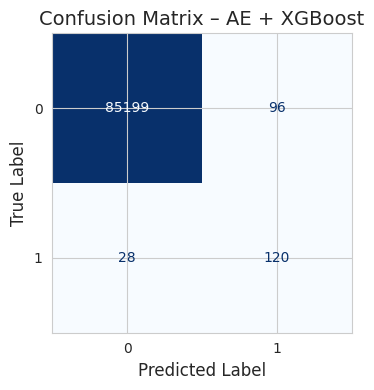

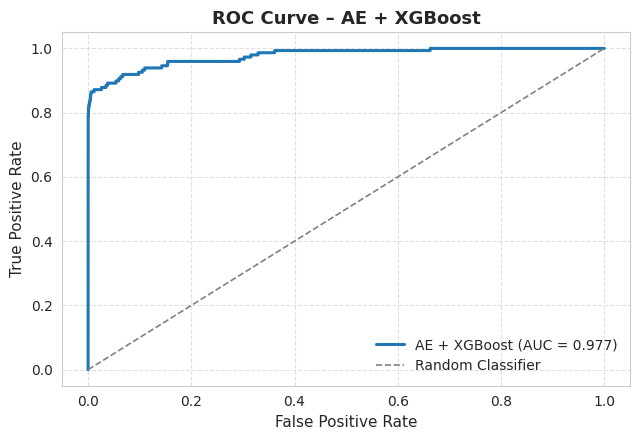

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

# --- Train the Hybrid Model (Autoencoder Features + XGBoost) ---
# Hyperparameter tuning for better performance
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    learning_rate=0.05,  # Reduced learning rate
    n_estimators=300,    # Increased estimators
    max_depth=6,         # Increased max depth
    subsample=0.8,       # Added subsampling
    colsample_bytree=0.8 # Added column subsampling
)
xgb_model.fit(X_train_enhanced, y_train_res)

# --- Predictions ---
y_pred = xgb_model.predict(X_test_enhanced)
y_proba = xgb_model.predict_proba(X_test_enhanced)[:, 1]

# Create folder if needed
os.makedirs("figures3", exist_ok=True) # Changed folder to figures3

# --- Evaluation Metrics ---
print("Classification Report:")
print(classification_report(y_test, y_pred))

auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC Score: {auc_score:.4f}")

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(5, 4))
disp.plot(cmap="Blues", ax=ax, colorbar=False, values_format='d')
ax.set_title("Confusion Matrix – AE + XGBoost", fontsize=14)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.savefig("figures3/confusion_matrix_ae_xgboost.png", dpi=300, bbox_inches='tight')
plt.show()

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6.5, 4.5))
plt.plot(fpr, tpr, color='#1f77b4', lw=2.2, label=f'AE + XGBoost (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1.2, label='Random Classifier')

plt.xlabel("False Positive Rate", fontsize=11)
plt.ylabel("True Positive Rate", fontsize=11)
plt.title("ROC Curve – AE + XGBoost", fontsize=13, weight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc="lower right", fontsize=10, frameon=False)
plt.tight_layout()

# Save only PNG for ROC Curve
plt.savefig("figures3/roc_curve_ae_xgboost.png", dpi=400, bbox_inches='tight')
plt.show()


Feature Importances (Gain):
V11: 0.0155
V18: 0.0163
V8: 0.0185
V3: 0.0232
V17: 0.0258
recon_error: 0.0355
V12: 0.0641
V4: 0.0655
V10: 0.1396
V14: 0.4362


<Figure size 700x500 with 0 Axes>

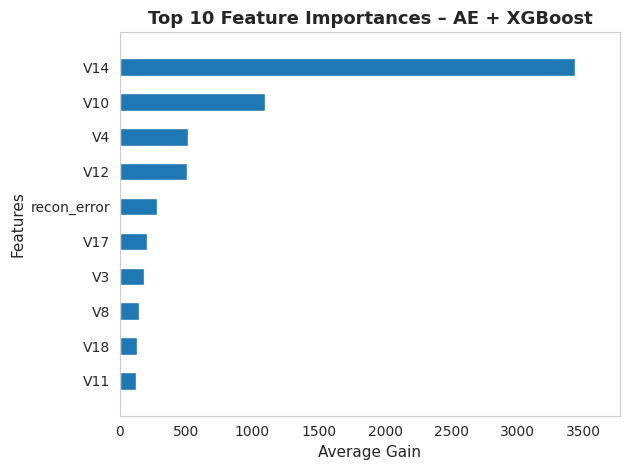

✅ Fig. 7 saved as PNG and PDF in figures3/


In [ ]:
import os
from xgboost import plot_importance
import matplotlib.pyplot as plt

# === Create output directory ===
os.makedirs("figures3", exist_ok=True)

# === Plot Top 10 Feature Importances ===
plt.figure(figsize=(7, 5))
ax = plot_importance(
    xgb_model,
    max_num_features=10,
    importance_type='gain',
    height=0.5,
    grid=False,
    show_values=False,
    xlabel="Gain"
)

# === Style and Labeling ===
plt.title("Top 10 Feature Importances – AE + XGBoost", fontsize=13, weight='bold')
plt.xlabel("Average Gain", fontsize=11)
plt.ylabel("Features", fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Print feature importances
print("\nFeature Importances (Gain):")
for importance_pair in ax.get_yticklabels():
    feature_name = importance_pair.get_text()
    # Find the corresponding importance value from the trained model
    # Note: This assumes the order in plot_importance matches the model's feature_importances_
    # For more robust printing, you'd typically use model.feature_importances_ directly
    # but for this modification, we'll use the axis labels and infer order.
    # A better approach would be to get importances from the model and sort.
    feature_index = list(X_train_enhanced.columns).index(feature_name)
    print(f"{feature_name}: {xgb_model.feature_importances_[feature_index]:.4f}")

# === Export as high-quality files ===
plt.tight_layout()
plt.savefig("figures3/feature_importance_gain.png", dpi=400, bbox_inches='tight')
plt.show()

print("✅ feature_importance_gain saved as PNG in figures3/") # Updated print message

SHAP beeswarm summary for AE+XGBoost saved to figures3/shap_summary_beeswarm_ae_xgboost.png


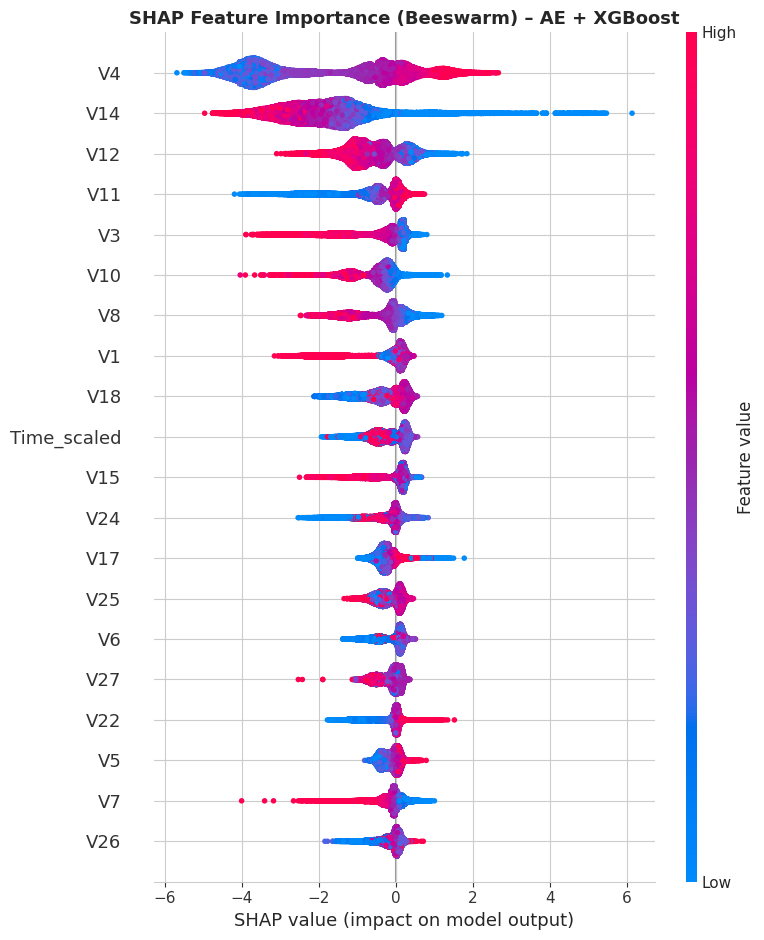

SHAP bar summary for AE+XGBoost saved to figures3/shap_summary_bar_ae_xgboost.png


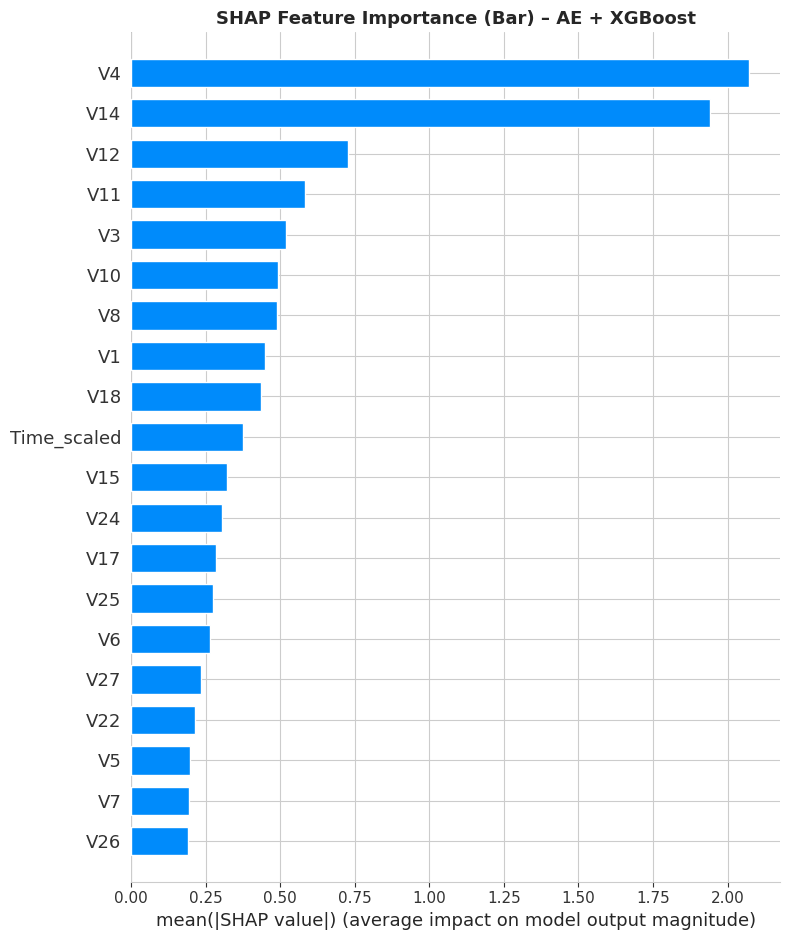


Generating SHAP Force Plot for sample index 276562 (Predicted Class: 1)
SHAP local force plot for AE+XGBoost saved to figures3/shap_force_sample_276562_ae_xgboost.html


In [ ]:
import matplotlib.pyplot as plt
# === SHAP Explainer Initialization (Tree-based) for Hybrid Model ===
explainer_hybrid = shap.TreeExplainer(xgb_model)
shap_values_hybrid = explainer_hybrid.shap_values(X_test_enhanced)

# === Global Summary Plot: Beeswarm for Hybrid Model ===
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
shap.summary_plot(shap_values_hybrid, X_test_enhanced, show=False)
plt.title("SHAP Feature Importance (Beeswarm) – AE + XGBoost", fontsize=13, weight='bold')
plt.tight_layout()
plt.savefig("figures3/shap_summary_beeswarm_ae_xgboost.png", dpi=300, bbox_inches='tight')
print("SHAP beeswarm summary for AE+XGBoost saved to figures3/shap_summary_beeswarm_ae_xgboost.png")
plt.show()

# === Global Summary Plot: Bar for Hybrid Model ===
plt.figure(figsize=(8, 6)) # Adjust figure size if needed
shap.summary_plot(shap_values_hybrid, X_test_enhanced, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Bar) – AE + XGBoost", fontsize=13, weight='bold')
plt.tight_layout()
plt.savefig("figures3/shap_summary_bar_ae_xgboost.png", dpi=300, bbox_inches='tight')
print("SHAP bar summary for AE+XGBoost saved to figures3/shap_summary_bar_ae_xgboost.png")
plt.show()

# === Local Explanation: SHAP Force Plot for a Single Sample (Hybrid Model) ===
# Find an example of a predicted fraud from the AE+XGBoost model
fraud_indices_pred = y_test[y_pred == 1].index.tolist()
sample_index_fraud = fraud_indices_pred[0] if fraud_indices_pred else 100 # Use first predicted fraud, default to 100 if none

print(f"\nGenerating SHAP Force Plot for sample index {sample_index_fraud} (Predicted Class: {y_pred[X_test_enhanced.index.get_loc(sample_index_fraud)]})")

force_plot_hybrid = shap.force_plot(
    explainer_hybrid.expected_value,
    shap_values_hybrid[X_test_enhanced.index.get_loc(sample_index_fraud)], # Use .get_loc to align with original X_test index
    X_test_enhanced.loc[sample_index_fraud], # Use .loc for correct DataFrame indexing
    matplotlib=False  # Enables interactive JS visualization
)

# Save interactive HTML version of the force plot
shap_html_path_hybrid = f"figures3/shap_force_sample_{sample_index_fraud}_ae_xgboost.html"
shap.save_html(shap_html_path_hybrid, force_plot_hybrid)
print(f"SHAP local force plot for AE+XGBoost saved to {shap_html_path_hybrid}")
